# DATA WRANGLING

In [5]:
import pandas as pd
import numpy as np

from datetime import datetime

In [6]:
df = pd.read_csv('SuperStore.csv')
df['Order Date']=pd.to_datetime( df['Order Date'])
df['Ship Date']=pd.to_datetime( df['Ship Date'])
df.head()


,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,606,4132,2011-05-28,Not Specified,5,14.76,0.01,Regular Air,1.32,2.88,...,Aaron Bergman,Nunavut,Nunavut,Corporate,Office Supplies,Labels,Avery 49,Small Box,0.36,2011-05-30
1,2847,20513,2009-07-07,High,13,42.27,0.01,Express Air,4.56,2.84,...,Aaron Bergman,Alberta,West,Corporate,Office Supplies,Pens & Art Supplies,SANFORD Liquid Accent� Tank-Style Highlighters,Wrap Bag,0.54,2009-07-08
2,5086,36262,2010-07-27,Not Specified,23,164.02,0.03,Express Air,-47.64,6.68,...,Aaron Bergman,Alberta,West,Corporate,Office Supplies,Paper,Xerox 1968,Small Box,0.37,2010-07-28
3,5087,36262,2010-07-27,Not Specified,23,136.81,0.01,Regular Air,-30.51,5.68,...,Aaron Bergman,Alberta,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Acme� Preferred Stainless Steel Scissors,Small Pack,0.56,2010-07-28
4,5088,36262,2010-07-27,Not Specified,26,4701.69,0.00,Express Air,1148.90,205.99,...,Aaron Bergman,Alberta,West,Corporate,Technology,Telephones and Communication,V70,Small Box,0.59,2010-07-27


In [8]:
df_order=df.set_index('Order Date')
df_row=df.set_index('Row ID')
df_order.sort_index()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2009-01-01,1914,13729,Not Specified,9,872.4800,0.08,Express Air,-342.91,95.99,35.00,Matt Collister,Quebec,Quebec,Home Office,Office Supplies,Storage & Organization,Safco Industrial Wire Shelving,Large Box,NaN,2009-01-03
2009-01-01,4031,28774,High,32,180.3600,0.10,Regular Air,-111.80,5.98,4.69,Jessica Myrick,Ontario,Ontario,Small Business,Office Supplies,Storage & Organization,"Perma STOR-ALL� Hanging File Box, 13 1/8""W x 1...",Small Box,0.68,2009-01-02
2009-01-02,5272,37537,Low,4,1239.0600,0.00,Delivery Truck,-193.08,291.73,48.80,Alan Schoenberger,British Columbia,West,Corporate,Furniture,Chairs & Chairmats,Hon 4070 Series Pagoda� Armless Upholstered St...,Jumbo Drum,0.56,2009-01-02
2009-01-02,6224,44069,Critical,16,137.6300,0.09,Express Air,26.71,9.11,2.15,Elizabeth Moffitt,British Columbia,West,Consumer,Office Supplies,Paper,"Black Print Carbonless Snap-Off� Rapid Letter,...",Wrap Bag,0.40,2009-01-04
2009-01-02,6225,44069,Critical,43,614.8000,0.08,Regular Air,247.79,15.04,1.97,Elizabeth Moffitt,British Columbia,West,Consumer,Office Supplies,Paper,White GlueTop Scratch Pads,Wrap Bag,0.39,2009-01-02
2009-01-02,5273,37537,Low,43,4083.1900,0.07,Delivery Truck,-1049.85,100.98,45.00,Alan Schoenberger,British Columbia,West,Corporate,Furniture,Chairs & Chairmats,Hon Valutask� Swivel Chairs,Jumbo Drum,0.69,2009-01-04
2009-01-02,5274,37537,Low,32,4902.3800,0.05,Regular Air,1438.49,155.06,7.07,Alan Schoenberger,British Columbia,West,Corporate,Office Supplies,Storage & Organization,"Dual Level, Single-Width Filing Carts",Small Box,0.59,2009-01-09
2009-01-02,1279,9285,Critical,3,124.8100,0.06,Regular Air,-11.94,40.98,2.99,David Philippe,Nova Scotia,Atlantic,Consumer,Office Supplies,Binders and Binder Accessories,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Small Box,0.36,2009-01-04
2009-01-03,4224,30016,Critical,8,754.6555,0.01,Regular Air,-212.55,110.99,2.50,Bill Donatelli,Ontario,Ontario,Corporate,Technology,Telephones and Communication,T18,Small Box,0.57,2009-01-06


In [9]:
customerList=set(df['Customer Name'])
for c in customerList:
    df_temp=df_order[df_order['Customer Name']==c]
    df_temp=df_temp.sort_index()
#    df2=df2.set_index('Order Date')
    df_temp['tvalue'] = df_temp.index
    df_temp['delta'] = (df_temp['tvalue']-df_temp['tvalue'].shift()).fillna(0)
    df_temp['PreviousOrderDelta'] = df_temp['delta'].apply(lambda x: x  / np.timedelta64(1,'D'))


    df_temp=df_temp.set_index('Row ID')

 
    df_row.loc[df_temp.index,'PreviousOrderDelta']=df_temp.loc[df_temp.index,'PreviousOrderDelta']
    #print df_row.loc[df_temp.index,'delta']
    #print df_temp.loc[df_temp.index,'delta']
    


In [10]:
df_row.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,...,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,PreviousOrderDelta
Row ID,,,,,,,,,,,,,,,,,,,,,
606,4132,2011-05-28,Not Specified,5,14.76,0.01,Regular Air,1.32,2.88,0.50,...,Nunavut,Nunavut,Corporate,Office Supplies,Labels,Avery 49,Small Box,0.36,2011-05-30,200.0
2847,20513,2009-07-07,High,13,42.27,0.01,Express Air,4.56,2.84,0.93,...,Alberta,West,Corporate,Office Supplies,Pens & Art Supplies,SANFORD Liquid Accent� Tank-Style Highlighters,Wrap Bag,0.54,2009-07-08,6.0
5086,36262,2010-07-27,Not Specified,23,164.02,0.03,Express Air,-47.64,6.68,6.15,...,Alberta,West,Corporate,Office Supplies,Paper,Xerox 1968,Small Box,0.37,2010-07-28,385.0
5087,36262,2010-07-27,Not Specified,23,136.81,0.01,Regular Air,-30.51,5.68,3.60,...,Alberta,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Acme� Preferred Stainless Steel Scissors,Small Pack,0.56,2010-07-28,0.0
5088,36262,2010-07-27,Not Specified,26,4701.69,0.00,Express Air,1148.90,205.99,2.50,...,Alberta,West,Corporate,Technology,Telephones and Communication,V70,Small Box,0.59,2010-07-27,0.0


In [22]:
custAggregations = {
    'Sales': { 
        'total_sales': 'sum'
    },
   'Profit': { 
        'total_profit': 'sum'
    },
   'Order ID': { 
        'number_orders': 'count'
    },
    'Order Quantity': {
        'total_quantity': 'sum'
    },
    'Unit Price': {
        'average_price': 'mean'
    },
    'Discount': {
        'average_discount': 'mean'
    },
    'PreviousOrderDelta':{
        'average_days_between_orders':'mean',
        'max_days_between_orders':'max'

    },
    'Product Category': {
        'purchased_categories':'nunique'
    }
}


statsByCustomer=df_row.groupby('Customer Name').agg(custAggregations)
statsByCustomer.columns = statsByCustomer.columns.droplevel()
statsByCustomer.head()

,total_quantity,average_price,purchased_categories,average_discount,total_profit,max_days_between_orders,average_days_between_orders,total_sales,number_orders
Customer Name,,,,,,,,,
Aaron Bergman,168,57.217143,2,0.032857,3025.84,385.0,99.428571,11630.5900,7
Aaron Hawkins,370,97.595833,3,0.056667,5961.41,171.0,72.166667,27690.7255,12
Aaron Smayling,303,20.597857,3,0.042857,2114.40,555.0,78.071429,8835.3235,14
Adam Bellavance,333,28.623333,3,0.045000,-181.94,490.0,103.000000,11577.5800,12
Adam Hart,506,48.752593,3,0.054444,4071.84,285.0,52.333333,26114.2645,27


In [111]:
prodAggregations = {
    'Sales': { 
        'total_sales': 'sum'
    },
   'Profit': { 
        'total_profit': 'sum'
    },
   'Order ID': { 
        'number_orders': 'count'
    },
    'Order Quantity': {
        'total_quantity': 'sum'
    },
    'Unit Price': {
        'average_price': 'mean'
    },
    'Discount': {
        'average_discount': 'mean'
    }
    
}


statsByProductCat=df_row.groupby('Product Category').agg(prodAggregations)

statsByProductCat.head()

,Order Quantity,Profit,Sales,Discount,Unit Price,Order ID
,total_quantity,total_profit,total_sales,average_discount,average_price,number_orders
Product Category,,,,,,
Furniture,44324,117433.03,5178590.542,0.049287,121.543991,1724
Office Supplies,118278,518021.43,3752762.100,0.050230,36.066896,4610
Technology,52175,886313.52,5984248.182,0.048746,181.408717,2065


# UNSUPERVISED LEARNING


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

In [51]:
X=np.array(statsByCustomer)


In [49]:
train_data = X[:7000]
#test_data = X[7000:]
#print train_data.shape, test_data.shape


In [63]:
# We only cluster on 2 dimensions
X1=np.array(statsByCustomer[["average_days_between_orders","total_sales"]])
train_data = X1[:7000]
train_proj = X1[:7000]


In [47]:
expvar=[]
kvalues=range(1,9)
for k in kvalues:
    pca = PCA(n_components=k)
    pca.fit(train_data)
    print("%d:%3.5f"%(k,sum(pca.explained_variance_ratio_))) 
    expvar.append(sum(pca.explained_variance_ratio_))
### STUDENT END ###

plt.plot(kvalues,expvar)
plt.title('Explained variance along number of clusters')

1:1.00000
2:1.00000


ValueError: n_components=3 invalid for n_features=2

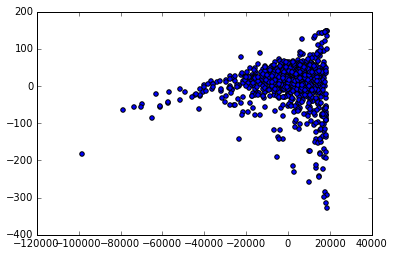

In [64]:
import matplotlib as mpl
cmap, norm = mpl.colors.from_levels_and_colors([0, 0.5, 1.1], ['red', 'blue'])

pca = PCA(n_components=2)
train_proj=pca.fit_transform(train_data)

x_plot= [i[0] for i in train_proj]
y_plot= [i[1] for i in train_proj]
plt.scatter(train_proj[:,0],train_proj[:,1])


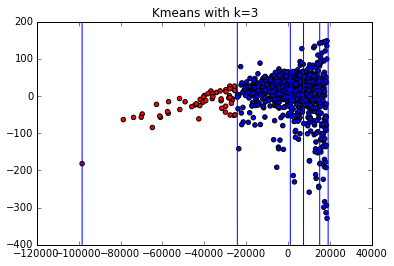

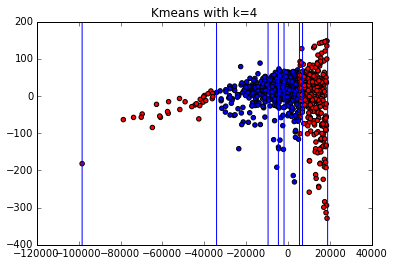

In [65]:
def get_distance(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    

random_state=10

for n_clusters in range(3,5):
    fig=plt.figure(n_clusters)
    plt.title("Kmeans with k=%d" %n_clusters)
    clf=KMeans(n_clusters=n_clusters, random_state=random_state)
    train_pred = clf.fit_predict(train_proj)
  
    plt.scatter(train_proj[:, 0], train_proj[:, 1], c=train_pred, cmap=cmap)
    ax=fig.add_subplot(1,1,1)

    for k in range(n_clusters): 
        maxdist=0
        center=clf.cluster_centers_[k]
        for point in train_proj[train_pred==k]:
            maxdist=max([maxdist,get_distance(point,center)])
        circ=plt.Circle(clf.cluster_centers_[k],maxdist,color='b',fill=False)
        ax.add_patch(circ)

    plt.show()

In [139]:
res=pd.DataFrame()
for i in range(4):
    res=res.append(pd.DataFrame(train_data[train_pred==i]).mean(),ignore_index=True)
res.columns=statsByCustomer.columns

In [142]:
res.sort_values('total_sales')

,total_quantity,max_days_between_orders,average_days_between_orders,total_profit,total_sales,average_discount,average_price,number_orders
1,173.555844,486.140260,141.840145,267.729221,7129.418058,0.048688,54.371079,7.119481
0,314.830935,427.025180,100.186955,1906.518345,21743.968705,0.049882,110.602846,12.194245
2,419.800000,385.923810,81.143397,5407.569143,39554.196762,0.049612,195.344945,15.971429
3,605.777778,329.148148,63.472723,11884.643333,73065.218944,0.050835,178.941206,21.888889


# Hierarchical Clustering

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

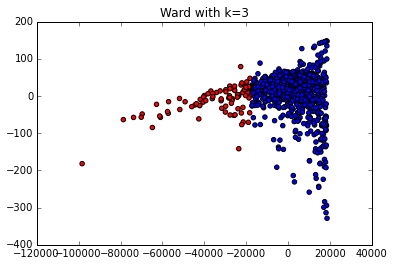

In [66]:
from sklearn.cluster import AgglomerativeClustering

for n_clusters in range(3,5):
    fig=plt.figure(n_clusters)
    plt.title("Ward with k=%d" %n_clusters)
    clf= AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    train_pred = clf.fit_predict(train_proj)
      
    plt.scatter(train_proj[:, 0], train_proj[:, 1], c=train_pred, cmap=cmap)
    ax=fig.add_subplot(1,1,1)

    for k in range(n_clusters): 
        maxdist=0
        for point in train_proj[train_pred==k]:
            maxdist=max([maxdist,get_distance(point,center)])
        circ=plt.Circle(clf.cluster_centers_[k],maxdist,color='b',fill=False)
        ax.add_patch(circ)

    plt.show()